In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math, copy

In [4]:
# lets take a example
X = [0,2,4,6,10,12,34,25,3,9]
y = [25000, 40000, 70000, 80000, 110000, 110000, 140000, 130000, 300000, 80000]

df =pd.DataFrame({'Experience':X, 'Salary':y})

df


,Experience,Salary
0,0,25000
1,2,40000
2,4,70000
3,6,80000
4,10,110000
5,12,110000
6,34,140000
7,25,130000
8,3,300000
9,9,80000


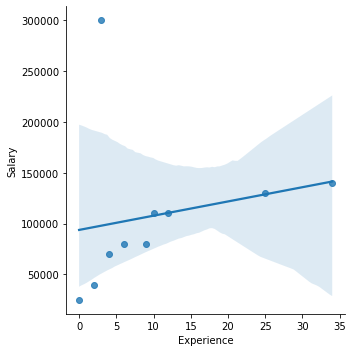

In [5]:
sns.lmplot(x='Experience', y='Salary', data=df)

In [6]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

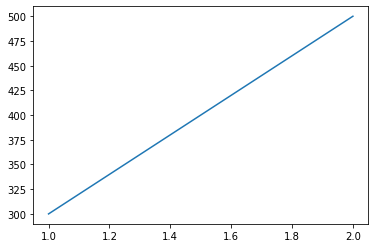

In [7]:
plt.plot(x_train, y_train)

In [8]:

def compute_cost(x, y, theta_1, theta_0): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      theta_1, theta_0 (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using theta_1, theta_0 as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = len(x)
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = theta_1 * x[i] + theta_0    # predicted value
        cost = (f_wb - y[i]) ** 2   # predicted - actual
        cost_sum = cost_sum + cost  
    total_cost = (1 / (m)) * cost_sum  

    return total_cost

In [9]:
compute_cost([1,2,3], [1,2,3],0,1)

1.6666666666666665

In [10]:
# Now, lets take different values of theta_1 (0,0.5,1,1.5,2,2.5)

all = np.linspace(0,40,num=100)
cost_values = []

for i in all:
    cost_values.append(compute_cost(x_train, y_train,0,i))

# cost_values

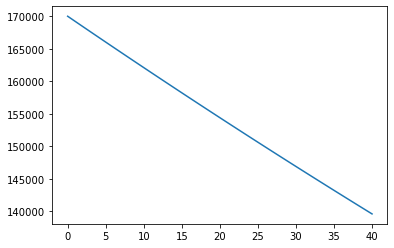

In [11]:
plt.plot(all, cost_values)

In [12]:
np.linspace(0,40,num=100)

array([ 0.        ,  0.4040404 ,  0.80808081,  1.21212121,  1.61616162,
        2.02020202,  2.42424242,  2.82828283,  3.23232323,  3.63636364,
        4.04040404,  4.44444444,  4.84848485,  5.25252525,  5.65656566,
        6.06060606,  6.46464646,  6.86868687,  7.27272727,  7.67676768,
        8.08080808,  8.48484848,  8.88888889,  9.29292929,  9.6969697 ,
       10.1010101 , 10.50505051, 10.90909091, 11.31313131, 11.71717172,
       12.12121212, 12.52525253, 12.92929293, 13.33333333, 13.73737374,
       14.14141414, 14.54545455, 14.94949495, 15.35353535, 15.75757576,
       16.16161616, 16.56565657, 16.96969697, 17.37373737, 17.77777778,
       18.18181818, 18.58585859, 18.98989899, 19.39393939, 19.7979798 ,
       20.2020202 , 20.60606061, 21.01010101, 21.41414141, 21.81818182,
       22.22222222, 22.62626263, 23.03030303, 23.43434343, 23.83838384,
       24.24242424, 24.64646465, 25.05050505, 25.45454545, 25.85858586,
       26.26262626, 26.66666667, 27.07070707, 27.47474747, 27.87

To implement Gradient Descent Algorithm, we need three functions
- compute_cost
- compute gardient
- gradient_descent


compute gardient -> returns the value of Differentials

gradient_descent -> uses both compute_cost and compute_gradient

In [13]:
def compute_gradient(x, y, theta_1, theta_0): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters theta_1
      dj_db (scalar): The gradient of the cost w.r.t. the parameter theta_0
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = theta_1 * x[i] + theta_0
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [14]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing